In [2]:
import pandas as pd 
company_df = pd.read_csv('company_train.csv')

In [3]:
company_df.head()

,ID,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,TRAIN_0000,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,TRAIN_0001,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8
2,TRAIN_0002,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5
3,TRAIN_0003,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,TRAIN_0004,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1


In [4]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   설립연도            4376 non-null   int64  
 2   국가              4376 non-null   object 
 3   분야              3519 non-null   object 
 4   투자단계            4376 non-null   object 
 5   직원 수            4202 non-null   float64
 6   인수여부            4376 non-null   object 
 7   상장여부            4376 non-null   object 
 8   고객수(백만명)        3056 non-null   float64
 9   총 투자금(억원)       4376 non-null   float64
 10  연매출(억원)         4376 non-null   float64
 11  SNS 팔로워 수(백만명)  4376 non-null   float64
 12  기업가치(백억원)       3156 non-null   object 
 13  성공확률            4376 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 478.8+ KB


In [5]:
company_df.describe()

,설립연도,직원 수,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),성공확률
count,4376.000000,4202.000000,3056.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,2012.006856,2471.324369,49.214332,3314.568556,6452.202239,2.578103,0.537340
std,6.554872,1446.064215,27.141242,1880.103831,3782.792656,1.414590,0.241698
min,2001.000000,5.000000,1.000000,12.000000,12.000000,0.000000,0.100000
25%,2006.000000,1218.250000,27.000000,1651.500000,3094.250000,1.320000,0.400000
50%,2012.000000,2472.000000,49.000000,3398.000000,6478.500000,2.835000,0.600000
75%,2018.000000,3727.500000,72.000000,4908.250000,9692.500000,4.000000,0.700000
max,2023.000000,4998.000000,99.000000,7059.000000,14822.000000,5.000000,0.900000


In [6]:
company_df.isnull().sum()

ID                   0
설립연도                 0
국가                   0
분야                 857
투자단계                 0
직원 수               174
인수여부                 0
상장여부                 0
고객수(백만명)          1320
총 투자금(억원)            0
연매출(억원)              0
SNS 팔로워 수(백만명)       0
기업가치(백억원)         1220
성공확률                 0
dtype: int64

In [7]:
#분야, 직원, 고객수, 기업가치 
company_df['분야'].fillna('None', inplace= True)


C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\3026535441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  company_df['분야'].fillna('None', inplace= True)


In [8]:
company_df['분야'].isnull().sum()

0

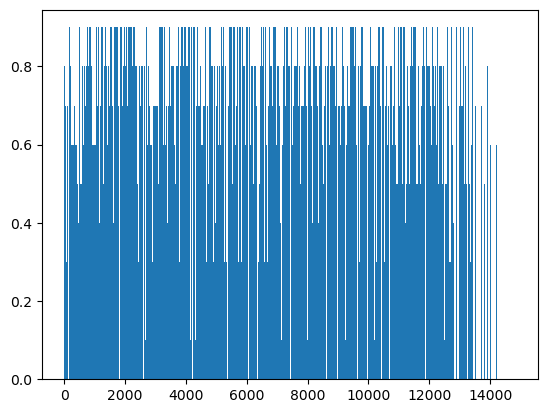

In [9]:
import matplotlib.pyplot as plt
plt.bar(company_df['연매출(억원)'], company_df['성공확률'], width = 10)
plt.show()

In [10]:
#연매출의 분포를 category로 나눔 
# 이를 기반으로 평균값을 냄 
company_df['연매출'] = (company_df['연매출(억원)'] // 1000)

In [11]:
company_df['연매출'].head()

0     4.0
1     0.0
2    12.0
3    10.0
4     9.0
Name: 연매출, dtype: float64

In [12]:
company_df['연매출(억원)']

0        4764.0
1         279.0
2       12141.0
3       10547.0
4        9810.0
         ...   
4371     9394.0
4372     2969.0
4373     4512.0
4374     3755.0
4375     9417.0
Name: 연매출(억원), Length: 4376, dtype: float64

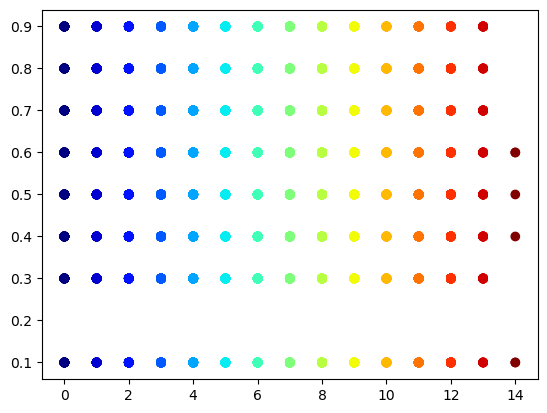

In [13]:
plt.scatter(company_df['연매출'], company_df['성공확률'], c = company_df['연매출'], cmap = 'jet')
plt.show()

In [14]:
company_df['직원 수'].head()

0    4126.0
1    4167.0
2    3132.0
3    3245.0
4    1969.0
Name: 직원 수, dtype: float64

In [15]:
company_df['직원 수'].fillna({'직원 수':company_df['직원 수'].mean()}, inplace =True)

C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\3001145077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  company_df['직원 수'].fillna({'직원 수':company_df['직원 수'].mean()}, inplace =True)


In [16]:
company_df.isna().sum()

ID                   0
설립연도                 0
국가                   0
분야                   0
투자단계                 0
직원 수               174
인수여부                 0
상장여부                 0
고객수(백만명)          1320
총 투자금(억원)            0
연매출(억원)              0
SNS 팔로워 수(백만명)       0
기업가치(백억원)         1220
성공확률                 0
연매출                  0
dtype: int64

In [17]:
#직원수의 값또한 이산값으로 바꾸고 싶음 


#### 6000 이상 문제 해결 



In [18]:
company_groupby = company_df.groupby(by='기업가치(백억원)')['성공확률'].count()
company_groupby

기업가치(백억원)
1500-2500    621
2500-3500    635
3500-4500    628
4500-6000    679
6000이상       593
Name: 성공확률, dtype: int64

C:\Users\sjune\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sjune\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sjune\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sjune\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sjune\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

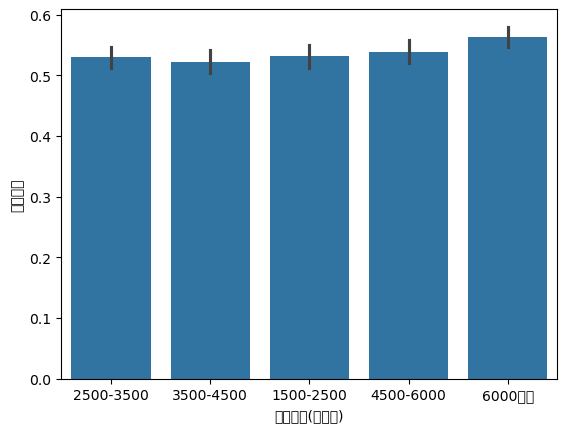

In [19]:
import seaborn as sns 
sns.barplot(x='기업가치(백억원)', y='성공확률', data = company_df)
plt.show()

C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\3178606112.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  company_df['직원 수'].fillna(company_df['직원 수'].mean(),inplace =True)


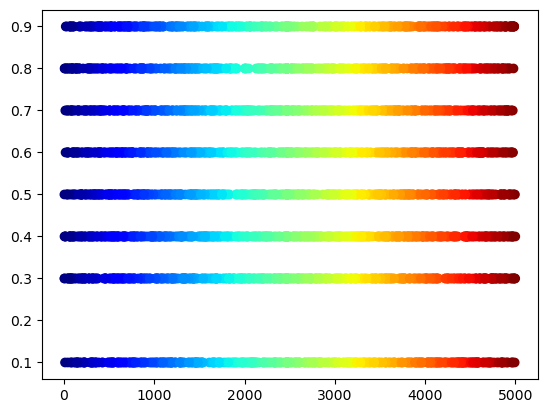

In [20]:
company_df['직원 수'].fillna(company_df['직원 수'].mean(),inplace =True)
plt.scatter(company_df['직원 수'], company_df['성공확률'], c = company_df['직원 수'], cmap = 'jet')
plt.show()

In [21]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   설립연도            4376 non-null   int64  
 2   국가              4376 non-null   object 
 3   분야              4376 non-null   object 
 4   투자단계            4376 non-null   object 
 5   직원 수            4376 non-null   float64
 6   인수여부            4376 non-null   object 
 7   상장여부            4376 non-null   object 
 8   고객수(백만명)        3056 non-null   float64
 9   총 투자금(억원)       4376 non-null   float64
 10  연매출(억원)         4376 non-null   float64
 11  SNS 팔로워 수(백만명)  4376 non-null   float64
 12  기업가치(백억원)       3156 non-null   object 
 13  성공확률            4376 non-null   float64
 14  연매출             4376 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 512.9+ KB


C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\3656292045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  company_df['고객수(백만명)'].fillna(company_df['고객수(백만명)'].mean(),inplace =True)


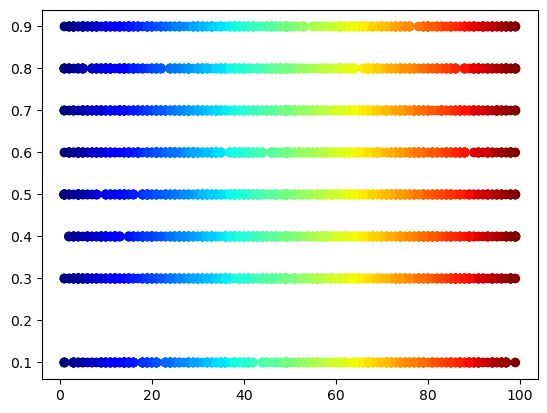

In [22]:
company_df['고객수(백만명)'].fillna(company_df['고객수(백만명)'].mean(),inplace =True)
plt.scatter(company_df['고객수(백만명)'], company_df['성공확률'], c = company_df['고객수(백만명)'], cmap = 'jet')
plt.show()

In [23]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   설립연도            4376 non-null   int64  
 2   국가              4376 non-null   object 
 3   분야              4376 non-null   object 
 4   투자단계            4376 non-null   object 
 5   직원 수            4376 non-null   float64
 6   인수여부            4376 non-null   object 
 7   상장여부            4376 non-null   object 
 8   고객수(백만명)        4376 non-null   float64
 9   총 투자금(억원)       4376 non-null   float64
 10  연매출(억원)         4376 non-null   float64
 11  SNS 팔로워 수(백만명)  4376 non-null   float64
 12  기업가치(백억원)       3156 non-null   object 
 13  성공확률            4376 non-null   float64
 14  연매출             4376 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 512.9+ KB


In [24]:
company_df['기업가치'] = company_df['기업가치(백억원)'].str[:4]

In [25]:
company_df['기업가치'].fillna('0000', inplace = True)
company_df['기업가치']

C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\362049880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  company_df['기업가치'].fillna('0000', inplace = True)


0       0000
1       2500
2       3500
3       0000
4       1500
        ... 
4371    1500
4372    6000
4373    0000
4374    4500
4375    4500
Name: 기업가치, Length: 4376, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(company_df['기업가치'])
company_df['기업가치'] = le.transform(company_df['기업가치'])


In [27]:
company_df['기업가치']


0       0
1       2
2       3
3       0
4       1
       ..
4371    1
4372    5
4373    0
4374    4
4375    4
Name: 기업가치, Length: 4376, dtype: int32

In [28]:
company_df.drop(['ID', '기업가치(백억원)'], axis =1, inplace = True)

In [29]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   설립연도            4376 non-null   int64  
 1   국가              4376 non-null   object 
 2   분야              4376 non-null   object 
 3   투자단계            4376 non-null   object 
 4   직원 수            4376 non-null   float64
 5   인수여부            4376 non-null   object 
 6   상장여부            4376 non-null   object 
 7   고객수(백만명)        4376 non-null   float64
 8   총 투자금(억원)       4376 non-null   float64
 9   연매출(억원)         4376 non-null   float64
 10  SNS 팔로워 수(백만명)  4376 non-null   float64
 11  성공확률            4376 non-null   float64
 12  연매출             4376 non-null   float64
 13  기업가치            4376 non-null   int32  
dtypes: float64(7), int32(1), int64(1), object(5)
memory usage: 461.7+ KB


In [30]:
company_df.head()

,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),성공확률,연매출,기업가치
0,2009,CT005,이커머스,Series A,4126.0,No,No,56.000000,3365.0,4764.0,4.71,0.3,4.0,0
1,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.000000,4069.0,279.0,1.00,0.8,0.0,2
2,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.000000,6453.0,12141.0,4.00,0.5,12.0,3
3,2016,CT006,None,Seed,3245.0,Yes,Yes,49.214332,665.0,10547.0,2.97,0.7,10.0,0
4,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.000000,829.0,9810.0,1.00,0.1,9.0,1


In [31]:
company_df.isna().sum()

설립연도              0
국가                0
분야                0
투자단계              0
직원 수              0
인수여부              0
상장여부              0
고객수(백만명)          0
총 투자금(억원)         0
연매출(억원)           0
SNS 팔로워 수(백만명)    0
성공확률              0
연매출               0
기업가치              0
dtype: int64

In [32]:
def fillna(df):
    df['분야'].fillna('None', inplace = True)
    df['직원 수'].fillna(df['직원 수'].mean(), inplace = True)
    df['고객수(백만명)'].fillna(df['고객수(백만명)'].mean(), inplace = True)
    df['기업가치(백억원)'].fillna('0000', inplace = True)
    return df 
def change(df):
    df['기업가치(백억원)'] = df['기업가치(백억원)'].str[:4]
    return df
def drop(df):
    df.drop('ID', axis = 1, inplace = True)
    return df
def format_features(df):
    features = ['국가', '분야', '투자단계', '인수여부', '상장여부', '기업가치(백억원)']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


In [33]:
df = pd.read_csv('company_train.csv')

In [34]:
df = fillna(df)
df = change(df)
df = drop(df)
df = format_features(df)
df.head()
#ID 떨구기 
#국가, 분야, 투자단계, 인수여부, 상장여부, 기업가치 

C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\3449003085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['분야'].fillna('None', inplace = True)
C:\Users\sjune\AppData\Local\Temp\ipykernel_26692\3449003085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,2009,4,7,2,4126.0,0,0,56.000000,3365.0,4764.0,4.71,0,0.3
1,2023,5,9,1,4167.0,1,0,80.000000,4069.0,279.0,1.00,2,0.8
2,2018,6,3,2,3132.0,1,1,54.000000,6453.0,12141.0,4.00,3,0.5
3,2016,5,1,1,3245.0,1,1,49.214332,665.0,10547.0,2.97,0,0.7
4,2020,1,6,1,1969.0,0,1,94.000000,829.0,9810.0,1.00,1,0.1


In [35]:
df.isna().sum()

설립연도              0
국가                0
분야                0
투자단계              0
직원 수              0
인수여부              0
상장여부              0
고객수(백만명)          0
총 투자금(억원)         0
연매출(억원)           0
SNS 팔로워 수(백만명)    0
기업가치(백억원)         0
성공확률              0
dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
df.drop('성공확률', axis = 1, inplace = True)
scaler = StandardScaler()
scaler.fit(df)
## dataframe으로 받기 위해 변형 
numeric_cols = df.select_dtypes(include='number').columns 
df_scaled = pd.DataFrame(
    scaler.transform(df[numeric_cols]),   # 또는 fit_transform
    columns=numeric_cols,
    index=df.index
)


In [37]:
df_scaled.head(10)

,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원)
0,-0.458773,-0.152978,0.799129,0.036385,1.167851,-1.032049,-0.966290,0.299224,0.026827,-0.446336,1.507250,-1.205150
1,1.677287,0.191380,1.426166,-0.668137,1.196789,0.968946,-0.966290,1.357538,0.401317,-1.632103,-1.115718,-0.089724
2,0.914408,0.535739,-0.454946,0.036385,0.466297,0.968946,1.034886,0.211031,1.669477,1.504034,1.005280,0.467990
3,0.609257,0.191380,-1.081983,-0.668137,0.546052,0.968946,1.034886,0.000000,-1.409428,1.082604,0.277071,-1.205150
4,1.219560,-1.186055,0.485610,-0.668137,-0.354535,-1.032049,1.034886,1.974888,-1.322189,0.887752,-1.115718,-0.647437
5,-0.001046,0.880098,-0.454946,1.445430,0.938470,-1.032049,1.034886,0.872477,1.697138,1.657642,0.298281,-0.089724
6,-0.611349,1.568816,-1.081983,0.740908,-1.166898,-1.032049,1.034886,0.000000,-0.141268,-1.529786,-1.285398,-0.089724
7,1.219560,-1.186055,-0.768465,0.036385,0.102816,-1.032049,-0.966290,1.357538,1.204556,-0.278451,1.005280,0.467990
8,-1.069076,-1.186055,-1.081983,0.740908,0.000000,-1.032049,-0.966290,0.000000,-0.315215,-1.026925,1.669860,-1.205150
9,-0.458773,0.880098,-1.081983,0.740908,-0.504162,-1.032049,-0.966290,0.000000,-1.611568,1.402774,-0.175409,-1.205150


In [38]:
df_scaled1 = scaler.transform(df)

In [39]:
df_scaled1[0, :]

array([-0.45877311, -0.15297848,  0.7991286 ,  0.0363853 ,  1.16785146,
       -1.03204896, -0.96628997,  0.29922365,  0.02682682, -0.44633564,
        1.50724977, -1.20515018])